In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [ ]:
def selfish_mining(q, n, gamma):
    # q = hashrate de l'attaquant
    # gamma = connectivité de l'attaquand 
    # n = nombre de simulations

    H= 0 # Blocks minés par la blockchain officielle
    R= 0 # Blocks miné par l'attaquant

    for i in range(n):
        j=0
        bOfficielle = 0
        bAttack = 0
        diff = 0
        while(True):
            result = random.uniform(0,1) 
            if j == 0 : # l'attaque commence si l'attaquant arrive à avoir le premier block
                if result > q: # le nb généré est supérieur à la puissance de l'attaquant, l'attaque est terminée
                    H= H+1
                    break
                else:
                    j=1
                    bAttack += 1
            else: #On fait une simulation de qui mine le block entre l'attaquant et les honnetes mineurs
                if result > q:
                    bOfficielle += 1
                else:
                    bAttack += 1
                diff = bOfficielle - bAttack 
                if diff == 0 : # Les deux blockchains sont de même longueur
                    result = random.uniform(0,1) # on génère un random pour savoir si le prochains block sera miné sur celui de l'attaquant ou pas
                    if(result<=gamma):
                      
                        R += bAttack
                        H += bAttack
                        break

                    else:
                        H += bOfficielle + 1
                        break

                elif diff == 1: # La blockchain officielle est plus longue
                    H += bOfficielle
                    break

                elif diff == -1: # la blockchain de l'attaquant est plus longue
                    R += bAttack
                    H += bAttack
                    break


    moyenne_officielle = H / n
    moyenne_attaquant = R / n

    return moyenne_attaquant / moyenne_officielle # retourne le rendement

Le rendement est positif à partir de 0.425 pour gamma = 0.0
Le rendement est positif à partir de 0.4 pour gamma = 0.1
Le rendement est positif à partir de 0.395 pour gamma = 0.2
Le rendement est positif à partir de 0.375 pour gamma = 0.30000000000000004
Le rendement est positif à partir de 0.365 pour gamma = 0.4
Le rendement est positif à partir de 0.335 pour gamma = 0.5
Le rendement est positif à partir de 0.305 pour gamma = 0.6000000000000001
Le rendement est positif à partir de 0.23 pour gamma = 0.7000000000000001
Le rendement est positif à partir de 0.005 pour gamma = 0.8
Le rendement est positif à partir de 0.005 pour gamma = 0.9


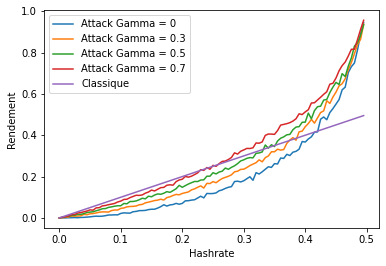

In [ ]:

n = 10000

results =[]
for gamma in np.arange(0,1,0.1):
  result = []
  positive_rendement = False
  for i in np.arange(0, 0.5, 0.005):  # hashrate allant de 0 à 0.5 avec un intervalle de 0.005
    temp = selfish_mining(i,  n, gamma) # le cout est égal au hashrate
    result.append(temp)
    if temp>i:
      if not positive_rendement : # permet de savoir à partir de quand le rendement est positif
            print("Le rendement est positif à partir de " +str(i)+ " pour gamma = "+str(gamma))
            positive_rendement = True
  results.append(result)
   




y = np.arange(0,0.5,0.005)
y_axis = np.array(y)

plt.plot(y_axis, results[0], label = "Attack Gamma = 0" ) #creation du plot
plt.plot(y_axis, results[3], label = "Attack Gamma = 0.3" ) 
plt.plot(y_axis, results[5], label = "Attack Gamma = 0.5" ) 
plt.plot(y_axis, results[7], label = "Attack Gamma = 0.7" ) 


plt.plot(y_axis,y_axis, label="Classique")
plt.legend()
plt.xlabel('Hashrate')
plt.ylabel('Rendement')
plt.show()